In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("Car_price.csv")

In [3]:
df.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,48,5100,47,53,5151
1,86.6,144.6,63.9,50.8,1713,92,2.91,3.41,9.6,58,4800,49,54,6479
2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000,31,38,6855
3,93.7,150.0,64.0,52.6,1837,79,2.91,3.07,10.1,60,5500,38,42,5399
4,93.7,150.0,64.0,52.6,1940,92,2.91,3.41,9.2,76,6000,30,34,6529


In [5]:
df.loc[2]
df.loc[[1,2]]
df.loc[1:3,'NAME':'BRANCH']


,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,86.6,144.6,63.9,50.8,1713,92,2.91,3.41,9.6,58,4800,49,54,6479
2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000,31,38,6855


In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x.shape)
print(y.shape)

(159, 13)
(159,)


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=36)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train[:,0:1],y_train)

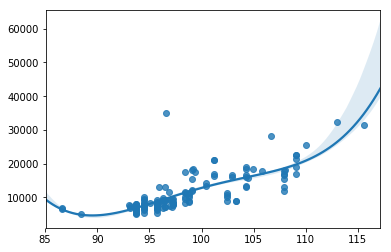

In [7]:
sns.regplot(x_train[:,0],y_train,order=4,ci=50)

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(x_train[:,0:1],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
from sklearn.metrics import r2_score
print(regressor.score(x_train[:,0:1],y_train))
print(regressor.score(x_test[:,0:1],y_test))


0.594653450386103
0.29044186677362915


In [10]:
for col in range(13):
    temp=x_train[:,col:col+1]
    test=x_test[:,col:col+1]
    reg=LinearRegression()
    reg.fit(temp,y_train)
    print(col+1," column")
    print("linear Regression")
    print("R2 of train:",reg.score(temp,y_train))
    print("R2 of test:",reg.score(test,y_test))
    print()

1  column
linear Regression
R2 of train: 0.594653450386103
R2 of test: 0.29044186677362915

2  column
linear Regression
R2 of train: 0.5874115257309271
R2 of test: 0.539100432854064

3  column
linear Regression
R2 of train: 0.684122437251421
R2 of test: 0.8240670521198155

4  column
linear Regression
R2 of train: 0.06812077412745243
R2 of test: 0.021211525756941074

5  column
linear Regression
R2 of train: 0.7882611301737484
R2 of test: 0.8387402250738003

6  column
linear Regression
R2 of train: 0.7223029385442026
R2 of test: 0.6462477166897587

7  column
linear Regression
R2 of train: 0.3299277413769338
R2 of test: 0.07447966481982948

8  column
linear Regression
R2 of train: 0.024593558346898137
R2 of test: 0.02778257667037831

9  column
linear Regression
R2 of train: 0.03196108607799086
R2 of test: 0.0820461670585273

10  column
linear Regression
R2 of train: 0.5601037599396204
R2 of test: 0.6452660529672234

11  column
linear Regression
R2 of train: 0.042192704510829016
R2 of test

In [11]:
x_train=x_train[:,[0,1,2,4,5,9,12]] #removing mlr

In [12]:
x_test=x_test[:,[0,1,2,4,5,9,12]] #removing mlr

In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(regressor.score(x_train,y_train))
print(regressor.score(x_test,y_test))

0.8292178665602177
0.849574742291106


# Polynomial Regression

In [ ]:
from sklearn.preprocesing import PolynomialFeature